# Nivell 1

## Exercici 1: Descarrega el data set Airlines Delay: Airline on-time statistics and delay causes i carrega’l a un pandas Dataframe. Explora les dades que conté, i queda’t únicament amb les columnes que consideris rellevants.

Link Airlines set: https://www.kaggle.com/giovamata/airlinedelaycauses

In [2]:
# load file
import pandas as pd

df1 = pd.read_csv('DelayedFlights.csv')

# fem una copia de seguretat per si necessitem les dades senceres, tal com estan enunciades.
df1copy = df1.copy()

## Exercici 2: Fes un informe complet del data set.

Primer carreguem les llibreries:

$\#\#\#\#\#\#\#$ Llibreries $\#\#\#\#\#\#\#$

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

$\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#\#$

###  Resumeix estadísticament les columnes d’interès

In [4]:
#Dimensions del dataset
print('Les dimensions del dataset son:', df1.shape)

Les dimensions del dataset son: (1936758, 30)


In [5]:
#informacio del dataset, ens diu quin tipus de data tenim:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1936758 entries, 0 to 1936757
Data columns (total 30 columns):
 #   Column             Dtype  
---  ------             -----  
 0   Unnamed: 0         int64  
 1   Year               int64  
 2   Month              int64  
 3   DayofMonth         int64  
 4   DayOfWeek          int64  
 5   DepTime            float64
 6   CRSDepTime         int64  
 7   ArrTime            float64
 8   CRSArrTime         int64  
 9   UniqueCarrier      object 
 10  FlightNum          int64  
 11  TailNum            object 
 12  ActualElapsedTime  float64
 13  CRSElapsedTime     float64
 14  AirTime            float64
 15  ArrDelay           float64
 16  DepDelay           float64
 17  Origin             object 
 18  Dest               object 
 19  Distance           int64  
 20  TaxiIn             float64
 21  TaxiOut            float64
 22  Cancelled          int64  
 23  CancellationCode   object 
 24  Diverted           int64  
 25  CarrierDelay      

In [6]:
#Abans de posar-nos amb la estadistica, fem una ullada al nostre dataset per determinar les columnes d'interes.
df1.head()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,...,4.0,8.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1,1,2008,1,3,4,754.0,735,1002.0,1000,WN,...,5.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN
2,2,2008,1,3,4,628.0,620,804.0,750,WN,...,3.0,17.0,0,N,0,NaN,NaN,NaN,NaN,NaN
3,4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,...,3.0,10.0,0,N,0,2.0,0.0,0.0,0.0,32.0
4,5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,...,4.0,10.0,0,N,0,NaN,NaN,NaN,NaN,NaN


In [7]:
df1.tail()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1936753,7009710,2008,12,13,6,1250.0,1220,1617.0,1552,DL,...,9.0,18.0,0,N,0,3.0,0.0,0.0,0.0,22.0
1936754,7009717,2008,12,13,6,657.0,600,904.0,749,DL,...,15.0,34.0,0,N,0,0.0,57.0,18.0,0.0,0.0
1936755,7009718,2008,12,13,6,1007.0,847,1149.0,1010,DL,...,8.0,32.0,0,N,0,1.0,0.0,19.0,0.0,79.0
1936756,7009726,2008,12,13,6,1251.0,1240,1446.0,1437,DL,...,13.0,13.0,0,N,0,NaN,NaN,NaN,NaN,NaN
1936757,7009727,2008,12,13,6,1110.0,1103,1413.0,1418,DL,...,8.0,11.0,0,N,0,NaN,NaN,NaN,NaN,NaN


Amb aquesta informacio podem fer un primer coarse analisis. 

Sembla que les dades van ser preses nomes l'any 2008 i que estan ordenades de Gener a Decembre, concretament del 3 de gener al 13 de decembre.

En algunes columnes falten valors, com en el cas de les: CarrierDelay, WeatherDelay, NASDelay, SecurityDelay, LateAircraftDelay. Per saber quants valors realment falten al dataset mes tard ho inspeccionarem amb la comanda .isnull().

Per tant, a primera vista les variables "dummy" d'aquest dataset podrien ser: Unnamed: 0 i Year.

In [8]:
# Per mes informacio, utilitzem la funcio describe() que ens fa l'estadistica basica de cada columna.
# descrimina les variables tipus objecte!
df1.describe()

,Unnamed: 0,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,1.936758e+06,1936758.0,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.936758e+06,1.929648e+06,1.936758e+06,1.936758e+06,...,1.936758e+06,1.929648e+06,1.936303e+06,1.936758e+06,1.936758e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06,1.247488e+06
mean,3.341651e+06,2008.0,6.111106e+00,1.575347e+01,3.984827e+00,1.518534e+03,1.467473e+03,1.610141e+03,1.634225e+03,2.184263e+03,...,7.656862e+02,6.812975e+00,1.823220e+01,3.268348e-04,4.003598e-03,1.917940e+01,3.703571e+00,1.502164e+01,9.013714e-02,2.529647e+01
std,2.066065e+06,0.0,3.482546e+00,8.776272e+00,1.995966e+00,4.504853e+02,4.247668e+02,5.481781e+02,4.646347e+02,1.944702e+03,...,5.744797e+02,5.273595e+00,1.433853e+01,1.807562e-02,6.314722e-02,4.354621e+01,2.149290e+01,3.383305e+01,2.022714e+00,4.205486e+01
min,0.000000e+00,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.517452e+06,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,1.203000e+03,1.135000e+03,1.316000e+03,1.325000e+03,6.100000e+02,...,3.380000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.242558e+06,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.545000e+03,1.510000e+03,1.715000e+03,1.705000e+03,1.543000e+03,...,6.060000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,2.000000e+00,0.000000e+00,8.000000e+00
75%,4.972467e+06,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.900000e+03,1.815000e+03,2.030000e+03,2.014000e+03,3.422000e+03,...,9.980000e+02,8.000000e+00,2.100000e+01,0.000000e+00,0.000000e+00,2.100000e+01,0.000000e+00,1.500000e+01,0.000000e+00,3.300000e+01
max,7.009727e+06,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.742000e+03,...,4.962000e+03,2.400000e+02,4.220000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


La funcio .describe() ens dona **nomes** la informacio estadistica de les variables en integer i float. La funcio integer no te en compte que alguna d'aquestes variables pot estar binaritzada, es a dir que potser estigui 0 i 1. Tambe, a vegades tambe ens interessa saber que passa a les variables tipus objecte, ja sigui per classificar o fer mes estadistica sobre les variables numeriques o fins i tot mapejar-les en variables integer per determinar la importancia estadistica de altres variables.

Per aixo, seguidement vaig a inspeccionar les variables tipus objecte, i per completesa les tipus integer i float.  Aixi sabem quin es el domini en que es troben les variables, a part, de que les variables integer i float segurament necessiten unitats, que no venen donades per el dataset i son impressindibles saber.

El primer que farem es inspeccionar el dominis de les variables i assignar unitats. Despres per completitud, utilitzare la funcio nunique(), per determinar el nombre de diferents valors en cada variable. Aixo ens dira de manera mes fina si variables com la "Unnamed: 0" i "Year" son realment precesindibles i no aporten valor estadistic a l'analisis.

Finalment, computarem la matriu de covariances i Pearson's correlation per determinar quines variables estan realment correlaciones i ens poden donar mes informacio en el sistem. Cal que tinguem en compte, que encara que hi hagi variables lleument correlacionades, en alguns casos son interessants de mantenir en el dataset per tal de crear noves columnes de variables mes interessants estadisticament.

In [9]:
# variables tipus objecte
df2 = df1.select_dtypes(include=object)

print('Aerolines', df1.UniqueCarrier.unique())
print('Numero de cua', df1.TailNum.unique())

print('+'.ljust(50, '-'))

print('Origen vol', df1.Origin.unique())
print('Desti vol', df1.Dest.unique())

print('+'.ljust(50, '-'))

print('Codis cancel.lacio', df1.CancellationCode.unique())


Aerolines ['WN' 'XE' 'YV' 'OH' 'OO' 'UA' 'US' 'DL' 'EV' 'F9' 'FL' 'HA' 'MQ' 'NW'
 '9E' 'AA' 'AQ' 'AS' 'B6' 'CO']
Numero de cua ['N712SW' 'N772SW' 'N428WN' ... 'N75428' 'N75429' 'N78008']
+-------------------------------------------------
Origen vol ['IAD' 'IND' 'ISP' 'JAN' 'JAX' 'LAS' 'LAX' 'LBB' 'LIT' 'MAF' 'MCI' 'MCO'
 'MDW' 'MHT' 'MSY' 'OAK' 'OKC' 'OMA' 'ONT' 'ORF' 'PBI' 'PDX' 'PHL' 'PHX'
 'PIT' 'PVD' 'RDU' 'RNO' 'RSW' 'SAN' 'SAT' 'SDF' 'SEA' 'SFO' 'SJC' 'SLC'
 'SMF' 'SNA' 'STL' 'TPA' 'TUL' 'TUS' 'ABQ' 'ALB' 'AMA' 'AUS' 'BDL' 'BHM'
 'BNA' 'BOI' 'BUF' 'BUR' 'BWI' 'CLE' 'CMH' 'CRP' 'DAL' 'DEN' 'DTW' 'ELP'
 'FLL' 'GEG' 'HOU' 'HRL' 'ROC' 'ORD' 'EWR' 'SYR' 'IAH' 'CRW' 'FAT' 'COS'
 'MRY' 'LGB' 'BFL' 'EUG' 'ICT' 'MEM' 'BTV' 'MKE' 'LFT' 'BRO' 'PWM' 'MSP'
 'SRQ' 'CLT' 'CVG' 'GSO' 'SHV' 'DCA' 'TYS' 'GSP' 'RIC' 'DFW' 'BGR' 'DAY'
 'GRR' 'CHS' 'CAE' 'TLH' 'XNA' 'GPT' 'VPS' 'LGA' 'ATL' 'MSN' 'SAV' 'BTR'
 'LEX' 'LRD' 'MOB' 'MTJ' 'GRK' 'AEX' 'PNS' 'ABE' 'HSV' 'CHA' 'MFE' 'MLU'
 'DSM' 'MGM' 'AVL' 'L

In [10]:
# variables tipus objecte. Ens interessa saber quin es el domini de les variables per
# si necessitem fer algun tipus de binning, com passa en els histogrames, ens interessa quedar-nos amb el 
# maxim de informacio.
df2 = df1.select_dtypes(include=int)

print('Analitzem quin es el domini de les dades numeriques (integers):') 

print('Index(?)', df2['Unnamed: 0'].min(), '-', df2['Unnamed: 0'].max(), 
     '<= Per aquesta variable parteixo de la suposicio que simplement es un index.')

print('+'.ljust(50, '-'))

print('Any:', df2.Year.min(), '-', df2.Year.max(), 
     "<= Les dades nomes son presses al 2008, unic valor.")
print('Mesos:', df2.Month.min(), '-', df2.Month.max())
print('Dies:', df2.DayofMonth.min(), '-', df2.DayofMonth.max(),
      'Siguent el primer dia que es prenen les dades:', df2.DayofMonth.iloc[0], 
      "i l'ultim", df2.DayofMonth.iloc[-1])
print('Dies de la setmana:', df2.DayOfWeek.min(),'-', df2.DayOfWeek.max())

print('+'.ljust(50, '-'))

# CRS: https://www.travel-industry-dictionary.com/computerized-reservation-system.html. Magatzem de dades que entre
# les quals trobem el temps de vol, hora sortida, hora arribada etc.

print('CRS Hora sortida:', df2.CRSDepTime.min(), '-', df2.CRSDepTime.max(),'. Unitats: hhmm', 
      '(hores i minuts junts sense separacio de dos punts)')

print("CRS Hora arribada:", df2.CRSArrTime.min(), '-', df2.CRSArrTime.max(), '. Unitats: hhmm')

print('Distancia:', df2.Distance.min(), '-', df2.Distance.max(), '. Unitats: milles.')

#To determine the units of the distance we run get the index of any of them, I took the min value for convenience,
# and then search from which airports the flight departed and arrived.
ind = df2.Distance.idxmin()
#df1.loc[ind,['Origin','Dest']] # Goes from JFK to LGA
# Google maps,then says that the distance between JFK airport (in Queens, NY) and La Guardia airport (in Queens, NY)
# it is around 11 miles. Then the units are in miles!
# if the flight crosses the sea, Google maps cannot compute the distance, since it uses roads, then
# another place to look for distances is: https://www.airmilescalculator.com/distance/ewr-to-hnl/
# this one is useful for fligh distances as the one that gives the maximum: EWR-HNL (Newark to Honolulu)

print('+'.ljust(50, '-'))

print('Numeros de vol:', df2.FlightNum.min(), '-', df2.FlightNum.max())
# Aquesta variable ens dona un domini molt inferior a l'esperat, podria ser que ens trobem que els 
# numeros de vol poden ser repetits?

print('+'.ljust(50, '-'))

print('Cancel.lat:', df2.Cancelled.min(), '-', df2.Cancelled.max(), 
      "<= es tracta d'una variable binaria, en que si s'ha cancel.lat el vol es 1, sino 0.")

print('Redirigit:', df2.Diverted.min(), '-', df2.Diverted.max(),
     "<= variable binaria, en que si s'ha redirigit el vol es 1, sino 0.")

Analitzem quin es el domini de les dades numeriques (integers):
Index(?) 0 - 7009727 <= Per aquesta variable parteixo de la suposicio que simplement es un index.
+-------------------------------------------------
Any: 2008 - 2008 <= Les dades nomes son presses al 2008, unic valor.
Mesos: 1 - 12
Dies: 1 - 31 Siguent el primer dia que es prenen les dades: 3 i l'ultim 13
Dies de la setmana: 1 - 7
+-------------------------------------------------
CRS Hora sortida: 0 - 2359 . Unitats: hhmm (hores i minuts junts sense separacio de dos punts)
CRS Hora arribada: 0 - 2400 . Unitats: hhmm
Distancia: 11 - 4962 . Unitats: milles.
+-------------------------------------------------
Numeros de vol: 1 - 9742
+-------------------------------------------------
Cancel.lat: 0 - 1 <= es tracta d'una variable binaria, en que si s'ha cancel.lat el vol es 1, sino 0.
Redirigit: 0 - 1 <= variable binaria, en que si s'ha redirigit el vol es 1, sino 0.


In [11]:
# variables tipus float
df2 = df1.select_dtypes(include=float)

print('Hora sortida:', df2.DepTime.min(), '-', df2.DepTime.max(), '. Unitats: hhmm')
print('Hora Arribada:', df2.ArrTime.min(), '-', df2.ArrTime.max(), '. Unitats: hhmm')

# Elapsed flying time. Actual time an airplane spends in the air, as opposed to time spent taxiing to 
# and from the gate and during stopovers. 
# By this definition I can infer that ElapsedTimes is when the airplane is about to take air, while 
# AirTime is when the aircraft gets cruise speed.  
# https://www.travel-industry-dictionary.com/elapsed-flying-time.html
print("Temps (periode) real de vol:", df2.ActualElapsedTime.min(), '-', df2.ActualElapsedTime.max(), 
      '. Unitats: minuts')
print("CRS Temps (periode) de vol:", df2.CRSElapsedTime.min(), '-', df2.CRSElapsedTime.max(), 
      '. Unitats: minuts')
print("Temps a l'aire:", df2.AirTime.min(), '-', df2.AirTime.max(), 
      '. Unitats: minuts')

print('+'.ljust(50, '-'))

print('Retard arribada:', df2.ArrDelay.min(), '-', df2.ArrDelay.max(), '. Unitats: minuts')
print('Retard sortida:', df2.DepDelay.min(), '-', df2.DepDelay.max(), '. Unitats: minuts')

print('+'.ljust(50, '-'))
# temps en taxi es quan l'avio va desde la terminal a la part de stop abans d'enlair-se (mirar def anteriors)
print('Temps en "taxi" a la sortida:', df2.TaxiIn.min(), '-', df2.TaxiIn.max(), '. Unitats: minuts')
print('Temps en "taxi" a la arribada:', df2.TaxiOut.min(), '-', df2.TaxiOut.max(), '. Unitats: minuts')

print('+'.ljust(50, '-'))

# referencia: 
#https://www.bts.gov/topics/airlines-and-airports/understanding-reporting-causes-flight-delays-and-cancellations
print('Retard Aerolinia:', df2.CarrierDelay.min(), '-', df2.CarrierDelay.max(), '. Unitats: minuts')
print('Retard Temps (extrem meteo events):', df2.WeatherDelay.min(), '-', df2.WeatherDelay.max(), '. Unitats: minuts')
print('Retard NAS (condicions pobres (no extrem), com ara: aerolina, temps, seguratat):', 
      df2.NASDelay.min(), '-', df2.NASDelay.max(), '. Unitats: minuts')
print('Retard Seguretat:', df2.SecurityDelay.min(), '-', df2.SecurityDelay.max(), '. Unitats: minuts')
print("Retard Avio (arriba tard a causa de retard al vol anterior):", df2.CarrierDelay.min(), '-', 
      df2.CarrierDelay.max(), '. Unitats: minuts')


Hora sortida: 1.0 - 2400.0 . Unitats: hhmm
Hora Arribada: 1.0 - 2400.0 . Unitats: hhmm
Temps (periode) real de vol: 14.0 - 1114.0 . Unitats: minuts
CRS Temps (periode) de vol: -25.0 - 660.0 . Unitats: minuts
Temps a l'aire: 0.0 - 1091.0 . Unitats: minuts
+-------------------------------------------------
Retard arribada: -109.0 - 2461.0 . Unitats: minuts
Retard sortida: 6.0 - 2467.0 . Unitats: minuts
+-------------------------------------------------
Temps en "taxi" a la sortida: 0.0 - 240.0 . Unitats: minuts
Temps en "taxi" a la arribada: 0.0 - 422.0 . Unitats: minuts
+-------------------------------------------------
Retard Aerolinia: 0.0 - 2436.0 . Unitats: minuts
Retard Temps (extrem meteo events): 0.0 - 1352.0 . Unitats: minuts
Retard NAS (condicions pobres (no extrem), com ara: aerolina, temps, seguratat): 0.0 - 1357.0 . Unitats: minuts
Retard Seguretat: 0.0 - 392.0 . Unitats: minuts
Retard Avio (arriba tard a causa de retard al vol anterior): 0.0 - 2436.0 . Unitats: minuts


In [12]:
# contem el numero de valors unics que hi ha a cada columna:
df1.nunique()

Unnamed: 0           1936758
Year                       1
Month                     12
DayofMonth                31
DayOfWeek                  7
DepTime                 1438
CRSDepTime              1207
ArrTime                 1440
CRSArrTime              1364
UniqueCarrier             20
FlightNum               7499
TailNum                 5366
ActualElapsedTime        673
CRSElapsedTime           515
AirTime                  650
ArrDelay                1128
DepDelay                1058
Origin                   303
Dest                     304
Distance                1419
TaxiIn                   180
TaxiOut                  332
Cancelled                  2
CancellationCode           4
Diverted                   2
CarrierDelay             983
WeatherDelay             599
NASDelay                 574
SecurityDelay            156
LateAircraftDelay        564
dtype: int64

Definitivament, veiem que la feature Unnamed: 0 te tantes entrades diferents com valors hi ha, per tan es un index. A mes que la feature Year, te nomes un valor (2008), tal com esperavem. per tan deixem anar aquestes 

In [13]:
# deixem anar les columnes Unnamed: 0 i Year
df1.drop(['Unnamed: 0', 'Year'], axis=1, inplace=True)

#### Matriu de covariancies i Pearson's correlation

Seguidament mirem com son les coviariances i la correlacio de Pearson's, ja que en donara informacio sobre quines dades estan correlacionades i quines son indepents. Aquestes dues mesures en ajuden a eliminar variables que son de poca significancia estadistica.

Hem de tenir en compte, que tan covariances i Pearson's no tenen en compte les variables tipus objecte. Aquestes les mantindrem en el dataset, encara que no tinguin significancia estadistica.

In [14]:
# covariances:
df1.cov()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,CRSElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
Month,12.128129,1.823158,6.133808e-04,-12.250832,-16.815350,1.935756,2.212481,-1.274399e+00,0.673315,1.750612,...,10.999921,0.361879,0.128490,1.815235e-03,0.001422,0.064120,0.498578,1.358226,-0.021762,0.730968
DayofMonth,1.823158,77.022951,3.061218e-01,4.010250,3.799446,4.007974,3.091041,-1.009048e+02,-0.556487,-0.017785,...,0.590079,-0.135434,-0.276928,7.409568e-04,0.000660,-0.362482,0.173186,1.679090,-0.005474,3.364943
DayOfWeek,0.000613,0.306122,3.983881e+00,19.713448,22.923957,11.940724,16.461024,-3.791713e+01,0.441870,0.705401,...,9.331518,0.089639,-0.294824,8.283790e-07,-0.000172,0.886616,0.242216,-0.447002,0.018809,0.740912
DepTime,-12.250832,4.010250,1.971345e+01,202936.964787,168694.723281,113322.577298,148927.503939,-2.171424e+04,-1526.839990,-1433.965192,...,-14493.381470,-28.560295,196.881959,1.856862e-02,-0.131777,-1027.759096,51.823067,346.319645,-14.035266,3237.697040
CRSDepTime,-16.815350,3.799446,2.292396e+01,168694.723281,180426.834023,92371.525562,140186.340329,-4.527350e+04,-1068.906891,-799.654719,...,-7202.723615,-72.527721,69.482955,1.770054e-04,-0.243982,-1968.638372,-84.532019,-465.974103,-14.537301,2971.003494
ArrTime,1.935756,4.007974,1.194072e+01,113322.577298,92371.525562,300499.275955,157758.323404,-1.456575e+04,-536.837814,-504.470366,...,-8733.832433,115.109681,11.216433,0.000000e+00,-0.101555,-2135.492635,-374.756765,640.011385,-8.760805,-931.943615
CRSArrTime,2.212481,3.091041,1.646102e+01,148927.503939,140186.340329,157758.323404,215885.415587,-5.421995e+04,1111.680049,1329.674579,...,6495.620804,33.859864,252.778704,1.684673e-03,0.026599,-1933.407243,-49.944504,144.145627,-12.467674,2552.867308
FlightNum,-1.274399,-100.904823,-3.791713e+01,-21714.241079,-45273.502330,-14565.754023,-54219.949657,3.781867e+06,-45157.330783,-46605.986170,...,-398580.749618,-40.174941,432.860454,3.215387e-01,-0.354252,4846.175651,2897.482753,1041.113825,-11.349459,-4427.830136
ActualElapsedTime,0.673315,-0.556487,4.418701e-01,-1526.839990,-1068.906891,-536.837814,1111.680049,-4.515733e+04,5192.653541,4984.851472,...,39409.768985,63.148404,298.562823,0.000000e+00,0.000000,31.361712,6.318497,433.274149,0.836406,-103.994709
CRSElapsedTime,1.750612,-0.017785,7.054007e-01,-1433.965192,-799.654719,-504.470366,1329.674579,-4.660599e+04,4984.851472,5089.600902,...,40237.959781,37.454896,126.675913,-5.050007e-03,0.109676,80.499496,-24.624872,110.482001,0.858499,-33.874220


<AxesSubplot:>

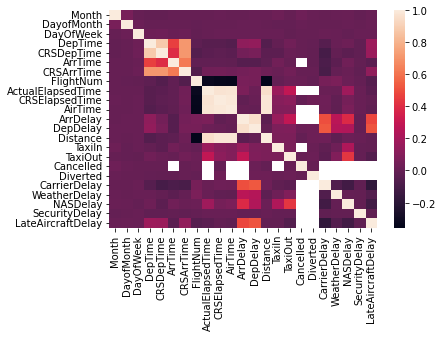

In [15]:
# Pearson's correlation
df1corr = df1.corr()
sns.heatmap(df1corr, xticklabels=True, yticklabels=True)

# per si volem la representacio grafica amb els valors de la cross correlation:
#fig, ax = plt.subplots(figsize=(15,10)) 
#sns.heatmap(df1corr, xticklabels=True, yticklabels=True, annot=True)

A la representacio de Person's correlation, veiem que tenim bastants parells colorejats en blanc, aixo es causa de que les parelles de features tenen ambdos valors nulls (si ens fixem amb l'apartat seguent podrem veure que es corresponen amb les columnes de valors nuls trobats). En aquests casos, el que podem fer es una inspeccio mes profunda de les dades i mirar si com es el comportament d'aquests valors nuls i si podem fer una columna nova que completi la informacio. Per exemple, en el cas Cancelled-ArrTime podem mapejar-ho com 0 el fet que no hi hagi hagut vol, i si no correspon a l'analisis que estem fent, fins i tot podem precindir de la columna.

Un altre punt interessant es veure que tenim alguns parells ("ActualElapsedTime", "CRSElapsedTime", "AirTime", "TaxiIn"). amb "FlightNum" anticorrelacionats. Cal tenir en compte que una variable sigui anticorrelacionada no te a veure que no sigui important. Matematicament la anticorrelacio ens diu que quan la variable X creix la variable Y decreix, el fet que sigui estadisticament important te a veure amb posar un threshold a la matriu de Pearson's i determinar quins son els valors que son fluctuacions i quins son els valors que son determinants de la conexio pairwise.

En el cas de les features comentades anteriorment fosin significants, vindrien a dir que el temps de vol no depen del numero de vol. En aquest cas seria interessant mapejar la feature "TailNum" (binaritzar en integers de 1 a 5366) per veure si esta correlacionada amb el "FlightNum" i com es comporta amb els temps de vol.

A l'analisi de correlacions, podem veure tambe que tenim 4 grups de features que estan fortament correlacionats. 

* El primer grup: DepTime, CRSDepTime, ArrTime i CRSArrTime.
* El segon grup: ActualElapsedTime, CRSElapsedTime, AirTime.
* El tercer grup: Distance, ActualElapsedTime, CRSElapsedTime, AirTime.
* El quart grup: ArrDelay, DepDelay.

L'unic grup interessant aqui, es el tercer grup, ja que ens permet relacionar la distancia amb el temps de vol. Els altres estan fortament correlacionats ja que es tracten de variacions del mateix temps.

Altres grups bastants correlacionats son:

* CarrierDelay, WeatherDelay, NASDelay, LateAricraftDelay, ArrDelay, DepDelay.
* WeatherDelay, TaxiIn, TaxiOut.

Amb aquests dos grups podriem, fins i tot, fer models en que, per example, si hi ha un tipus de extrem weather event (e.g. neu) el temps que tarda l'avio en recorre la pista i fins i tot en comencar el vol o aterrar en la pista.

Tot i que a simple vista, les variables menys correlaciones son les referents als dies, mes i dia de la setmana. Aquestes variables no les eliminare del dataset encara ja que poden ser utils per tan per recolzar la represntacio grafica tan com per saber si, per exemple, hi ha dies (o dies de la setmana) en concret o mesos en que els retards son mes pronunciats, i quins dies i mesos no hi ha retards. Si fessim un coarse analisis, i apliquessim un threshold (com ara la desviacio estadistica de la feature X en que volem comparar les altres features) segurament aquestes variables tenen de poca significancia al global del sistema serien considerades fluctuacions, i per tant en l'analisis no es tindrien en compte. Per aixo, en casos com aquest, si es possible es pot crear una nova variable o si no, mantenirles al dataset, i nomes cridarles per operacions puntuals.

Una altre molt bona eina de represntacio de correlacions entre pairwise variables es la funcio pairplot del seaborn, el que ens fa graficament la comparacio del pairwise en scatterplot i barplot, tot i que aquesta funcio te un problema de mida, com mes quantitat de features mes tarda en compilar la representacio.

### Troba quantes dades faltants hi ha per columna

In [16]:
# columnes amb valors nuls:
nulcol = df1.isnull().sum()
print('A cada columna te valors nuls:')
nulcol

A cada columna te valors nuls:


Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [17]:
print('Les columnes amb valors nuls son:')
print(nulcol[nulcol>0])
print('En total tenim', nulcol[nulcol>0].count(), 'columnes amb valors nuls.')

Les columnes amb valors nuls son:
ArrTime                7110
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
TaxiIn                 7110
TaxiOut                 455
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64
En total tenim 13 columnes amb valors nuls.


Una de les formes de solventar els valors nuls es intentar descobrir si poden ser canviats per algun altre tipus de valor (per exemple un valor potser NaN perque ve de una columna a on tenim un 0), es a dir, algun d'aquests valors poden ser rempajetas, altres formes de emplanar els nulls son utilitzant metodes com Imputer o KNNImputer. Amb aquests metodes hem de tenir cura estem creant valors basats en probabilitats i potser no s'escauen a la realitat de les dades.

Seguidament busquem les causes dels valors nuls i remapagem i treiem les columnes i files amb poc valor estadistic per l'analisis.

**Columnes poc significants per analisis de vols en retard**

Una de les features menys interessants per l'analisis estadistic del retard en els vols es la de cancel.lacio del vol (juntament amb CancellationCode). En aquest cas haurem de primer suprimir les files que corresponen a vols cancel.lats (vol cancel.lat == 1) i despres eliminarem la columna.

In [18]:
#Eliminem les files que tenen vols cancelats (cancelled == 1), per tant ens quedem amb els que tenen cancelled == 0:
df1 = df1[df1['Cancelled'] == 0]

# Deixem anar la columna de Cancelled i Cancellationcode. 
# Si el vol es cancel.lat, logicament, no pateix cap tipus de retard.
df1.drop(['Cancelled', 'CancellationCode'], axis=1, inplace=True)

df1.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,TPA,810,4.0,8.0,0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,TPA,810,5.0,10.0,0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,BWI,515,3.0,17.0,0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,BWI,515,3.0,10.0,0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,JAX,688,4.0,10.0,0,NaN,NaN,NaN,NaN,NaN


Una altre de les features que no ens indiquen res a l'analisis estadistic es la columna de Diverted (vol que ha sigut redirigit).

A mes podem veure que aquesta columna ens provoca els valors nuls a la columna de ArrTime.

In [19]:
df1[df1.ArrTime.isnull()].shape

(6477, 26)

In [20]:
df1[df1.ArrTime.isnull() & df1.Diverted == 1]

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Dest,Distance,TaxiIn,TaxiOut,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
1280,1,3,4,922.0,915,NaN,1050,WN,1069,N630WN,...,SMF,480,NaN,12.0,1,NaN,NaN,NaN,NaN,NaN
1372,1,3,4,2325.0,1900,NaN,2030,WN,2092,N302SW,...,SAN,447,NaN,11.0,1,NaN,NaN,NaN,NaN,NaN
1776,1,4,5,1949.0,1905,NaN,1910,WN,1403,N504SW,...,RNO,335,NaN,11.0,1,NaN,NaN,NaN,NaN,NaN
1831,1,4,5,737.0,705,NaN,825,WN,178,N718SW,...,SMF,358,NaN,13.0,1,NaN,NaN,NaN,NaN,NaN
2244,1,4,5,1849.0,1630,NaN,1755,WN,239,N636WN,...,RNO,345,NaN,12.0,1,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1924914,12,23,2,1331.0,1300,NaN,1637,CO,1092,N32626,...,CMH,986,NaN,22.0,1,NaN,NaN,NaN,NaN,NaN
1925528,12,22,1,1127.0,1120,NaN,1319,CO,1060,N12221,...,HDN,986,NaN,19.0,1,NaN,NaN,NaN,NaN,NaN
1925885,12,21,7,728.0,715,NaN,1150,CO,282,N78511,...,BOS,1597,NaN,16.0,1,NaN,NaN,NaN,NaN,NaN
1927070,12,19,5,1832.0,1730,NaN,2050,CO,787,N27734,...,SNA,2433,NaN,97.0,1,NaN,NaN,NaN,NaN,NaN


Com podem veure el nombre de columnes correspon al nombre de ArrTimes que ens falten, per tant, podem elimnar aquestes files i columnes.

In [21]:
#Eliminem les files que tenen vols redirigits (diverted == 1), per tant ens quedem amb els que tenen diverted == 0
df1 = df1[df1['Diverted'] == 0]

# Deixem anar la columna Diverted. 
df1.drop(['Diverted'], axis=1, inplace=True)

In [22]:
df1.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,IAD,TPA,810,4.0,8.0,NaN,NaN,NaN,NaN,NaN
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,IAD,TPA,810,5.0,10.0,NaN,NaN,NaN,NaN,NaN
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,IND,BWI,515,3.0,17.0,NaN,NaN,NaN,NaN,NaN
3,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,IND,JAX,688,4.0,10.0,NaN,NaN,NaN,NaN,NaN


Una altre columna que conte valors nuls (3 valors en concret) i es poc interessant per l'analisis que ens demanen a continuacio es el numero de cua. Aquesta columna seria interessant si volguessim analitzar quin son els avions (model) que tenen mes retards. A mes, aquesta columna conte la dificultat de que es tracta de un string+integer dels quals s'han de "handpicking" de uns llistats concrets, per aixo utilitzar metodes probabilitistics de introduccio de dades, com son SimpleImputer o KNNImputer pot provocar certes discordancies amb la resta del dataset. Es a dir, que al adjudicar-li un valor potser que no estigui al llistat de avions disponibles per la companyia o que aquest avio tingui assignat un vol per el mateix dia.

A mes estadisticament, extreure tres valors (files) de una base de dades tan gran com aquesta ($\approx 1930000$ valors), no penalitza o afecta significativament l'analisis estadistic que es pugui fer mes endavant.

Per aquest motiu, treurem les tres files en que TailNum es un valor nul.

In [23]:
# find indexes of the null values on TailNum
ind = df1.index[df1.TailNum.isnull()].tolist()

df1[df1.TailNum.isnull()]

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
523748,3,18,2,1716.0,1655,2036.0,1947,9E,3760,NaN,...,DSM,DTW,534,11.0,29.0,0.0,0.0,28.0,0.0,21.0
773772,5,8,4,1545.0,1530,1711.0,1707,OH,5043,NaN,...,CVG,CHS,497,5.0,15.0,NaN,NaN,NaN,NaN,NaN
776480,5,31,6,1720.0,1244,1920.0,1427,OH,5396,NaN,...,RDU,JFK,426,8.0,40.0,0.0,276.0,17.0,0.0,0.0


In [24]:
df1 = df1.drop(ind)

**Remapeig de les columnes amb valors nuls**

Despres d'eliminar les columnes de cancel.lacio i redirigits nomes ens queden les columnes: TailNum, CarrierDelay, WeatherDelay, NASDelay, SecurityDelay i LateAircraftDelay.

Fent una ullada al dataset, podem veure que les columnes dels minuts per els tipus de Delay (Carrier, Weather, NAS, Security, i, LateAircraft) en el dataset tenen un valor 0.0 **nomes** quan alguna de les altres columnes te un valor diferent de zero, es a dir, quan dona el cas que hi ha algun tipus de delay. En els casos que no hi hagut un delay de les categories esmentades, les files contenen valors nuls.

In [25]:
# mida total del data set
df1.shape

(1928368, 25)

In [26]:
# mirem quantes dades tenim no nules
df1[(df1.CarrierDelay >= 0) | (df1.WeatherDelay >= 0) | (df1.NASDelay >= 0) | (df1.SecurityDelay >= 0) | 
   (df1.LateAircraftDelay >= 0)].shape

(1247486, 25)

In [27]:
df1[df1.CarrierDelay.isnull()].shape

(680882, 25)

In [28]:
df1[(df1.CarrierDelay.isnull()) & (df1.WeatherDelay.isnull())].shape

(680882, 25)

In [29]:
df1[(df1.CarrierDelay.isnull()) & (df1.WeatherDelay.isnull()) & (df1.NASDelay.isnull())].shape

(680882, 25)

In [30]:
df1[(df1.CarrierDelay.isnull()) & (df1.WeatherDelay.isnull()) & (df1.NASDelay.isnull()) & 
    (df1.SecurityDelay.isnull())].shape

(680882, 25)

In [31]:
df1[(df1.CarrierDelay.isnull()) & (df1.WeatherDelay.isnull()) & (df1.NASDelay.isnull()) &
   (df1.SecurityDelay.isnull()) & (df1.LateAircraftDelay.isnull())].shape

(680882, 25)

Podem veure que la suma de les dades entre els valors nuls i no nuls es la mida del nostre dataset. A mes, tenint en compte nomes els valors nuls al afegir mes columnes la mida de la matriu no varia, per tant els valors nuls a les columnes indiquen que no hi ha cap tipus de delay dels llistats. Tot i aixi, cal tenir en compte que si mirem els vols que surten o arriben tard (DepTime o ArrTime comparat amb CRSDepTime i CRSArrTime) podem trobar que hi ha hagut algun retard, pero que no s'ha tingut en compte ja que el retard no es causat per cap d'aquestes categories.

Seguidament, emplenem els valors nuls amb 0.0 ja que es el temps que es dona a la base de dades quan aquests no han tingut un enderriment dels categoritzats.

In [32]:
df1[['CarrierDelay','WeatherDelay','NASDelay','SecurityDelay', 'LateAircraftDelay']] = df1[
    ['CarrierDelay', 'WeatherDelay','NASDelay','SecurityDelay', 'LateAircraftDelay']].fillna(0)

df1.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Origin,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,IAD,TPA,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,IAD,TPA,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,IND,BWI,515,3.0,17.0,0.0,0.0,0.0,0.0,0.0
3,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,IND,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0
4,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,IND,JAX,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0


In [33]:
# comprovem que no tenim mes valors nuls:
nulcol = df1.isnull().sum()
nulcol[nulcol>0].count()

0

Abans de passar a l'apartat seguent per completessa tornarem a fer un cop d'ull la Person's correlation, per veure si hi hagut canvis significatius en les correlacions pairwise.

<AxesSubplot:>

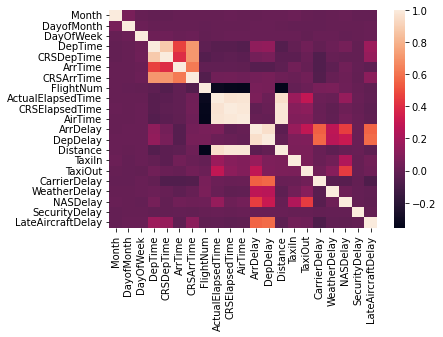

In [34]:
df1corr = df1.corr()
sns.heatmap(df1corr, xticklabels=True, yticklabels=True)

Ara, al tenir les dades netes, podem veure que les correlacions no ha canviat de forma significativa amb el resultat anterior, les dades amb correlacions baixes es mantenen igual en els pairwises en que hem fet la neteja, i no hi ha hagut canvis importants en el grau de correlacio dels sis grups amb les correlacions mes fortes.

### Crea columnes noves (velocitat mitjana del vol, si ha arribat tard o no...)

**Velocitat mitjana de vol** 

Les unitats que trio son **milles/hora**, cal tenir en compte de que les variables de temps estan en minuts, per tant hem fer la conversio:

$$\mbox{temps[h]} = \frac{1 \mbox{h}}{60 \mbox{min}}$$

Seleccionem la columna "Distance" i la columna "ActualElapsedTime". 

Triem la variable ActualElapsedTime, ja que els valors son consistentment mes grans que en la variable AirTime, aixo podria indicar que la variable AirTime seria el temps que esta en velocitat de creurer, mentre ActualElapsedTime a part te en compte el temps en que l'avio tarda en enlairar-se i aterrar. 

Anem-ho a analitzar:

In [35]:
df1.shape

(1928368, 25)

In [36]:
df1[df1.ActualElapsedTime > df1.AirTime].shape

(1928368, 25)

Efectivament, AirTime els temps son menors que ActualElapasedTime

In [37]:
ind = df1.index[df1.AirTime == 0].to_list()
df1.loc[ind,['Origin', 'Dest', 'Distance', 'ActualElapsedTime', 'AirTime']]

,Origin,Dest,Distance,ActualElapsedTime,AirTime
53543,SGU,SLC,269,98.0,0.0
54342,TWF,SLC,175,93.0,0.0
245633,ASE,ORD,1013,170.0,0.0
414132,MSY,MCI,690,144.0,0.0
441835,ASE,ORD,1013,153.0,0.0
782761,LAX,SAN,109,54.0,0.0
784702,SAN,LAX,109,28.0,0.0


Aqui podem veure que el nombre de milles i el temps de vol es suficientment petit com perque l'avio no hagi adquirit velocitat de creuer. En els vols ASE-ORD (Aspen-Chicago) i MSY-MCI (New Orleans-Kansas), que tenen mes milles, els vols son del voltant de 2.5-3h. En aquests casos els avions tampoc solen adquirir velocitat de creuer.

Per tant si volem saber la velocitat mitjana del vol hem de utilitzar la variable ActualElapsedTime.

Velocitat mitjana del vol:

In [38]:
tconversio = 60 #passem els minuts a hores ja que estem parlant de velocitat de un vehicle.

df1['VelocityAir'] = df1.Distance / (df1.ActualElapsedTime / 60) # amb unitats: [milles]/[hora]

df1.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,Dest,Distance,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,VelocityAir
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,TPA,810,4.0,8.0,0.0,0.0,0.0,0.0,0.0,379.687500
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,TPA,810,5.0,10.0,0.0,0.0,0.0,0.0,0.0,379.687500
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,BWI,515,3.0,17.0,0.0,0.0,0.0,0.0,0.0,321.875000
3,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,BWI,515,3.0,10.0,2.0,0.0,0.0,0.0,32.0,343.333333
4,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,JAX,688,4.0,10.0,0.0,0.0,0.0,0.0,0.0,408.712871


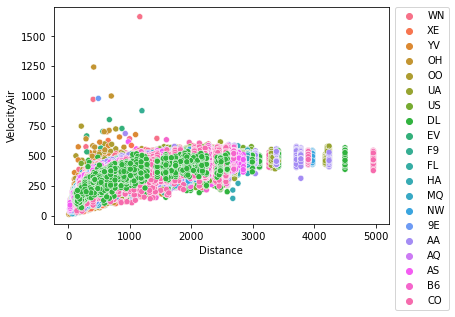

In [39]:
sns.scatterplot(data=df1, x='Distance', y='VelocityAir', hue='UniqueCarrier')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0)

**Vol ha arribat tard o no**

Aquesta sera una columna binaria, en que si el vol ha **arribat** tard la marcarem amb 1 i si no la marcarem amb 0.


La columna ArrDelay ens informa dels minuts tard que ha arribat el vol, per tant utilitzarem aquesta per decidir si el vol ha arribat tard o no. Si el valor es negatiu o igual a zero: el vol ha arribat aviat o a temps, si el valor es positiu, el vol ha arribat tard.

La columna ArrTime ens informa de la hora real en que l'avio ha arribat.

La columna CRSArrTime es la hora en que esta previst que arribi segons l'ordinador central (base de dades central).

In [74]:
# Si el valor es positiu superior a 0 indica que l'avio ha arribat tard, si es negatiu o 0 indica que l'avio
# ha arribat mes aviat o a temps.

# DelayArr == 1 avio retardat, DelayArr == 0 avio a temps.

df1['DelayedArr'] = np.where(df1.ArrDelay > 0, 1, 0)

df1.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,VelocityAir,DelayedArr,TotalDelayed,TaxiTime
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,8.0,0.0,0.0,0.0,0.0,0.0,379.687500,0,0.0,12.0
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,10.0,0.0,0.0,0.0,0.0,0.0,379.687500,1,0.0,15.0
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,17.0,0.0,0.0,0.0,0.0,0.0,321.875000,1,0.0,20.0
3,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,10.0,2.0,0.0,0.0,0.0,32.0,343.333333,1,34.0,13.0
4,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,10.0,0.0,0.0,0.0,0.0,0.0,408.712871,1,0.0,14.0


Plot Avio retard per companyia

<AxesSubplot:xlabel='UniqueCarrier', ylabel='DelayedArr'>

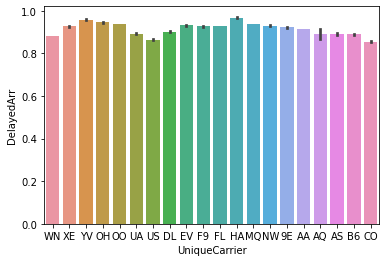

In [41]:
# barplot a l'eix y es la suma normalitzada els valors de 0 a 1.
sns.barplot(data=df1, x='UniqueCarrier', y='DelayedArr')


Plot UniqueCarrier by DayOfWeek, if delayed or not.

<AxesSubplot:xlabel='DayOfWeek', ylabel='DelayedArr'>

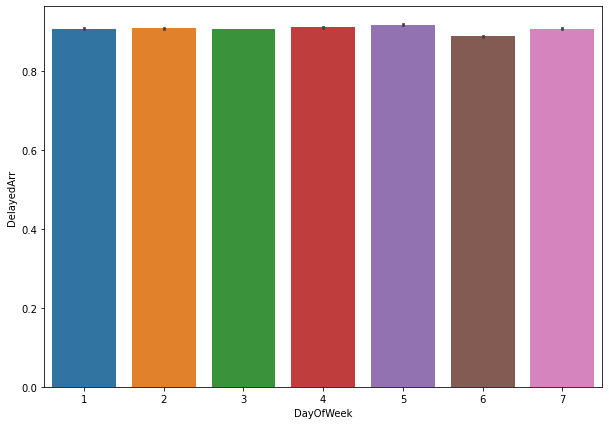

In [42]:
f, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data=df1, x='DayOfWeek', y ='DelayedArr')

Plot UniqueCarrier by DayofMonth, if delayed or not.

<AxesSubplot:xlabel='DayofMonth', ylabel='DelayedArr'>

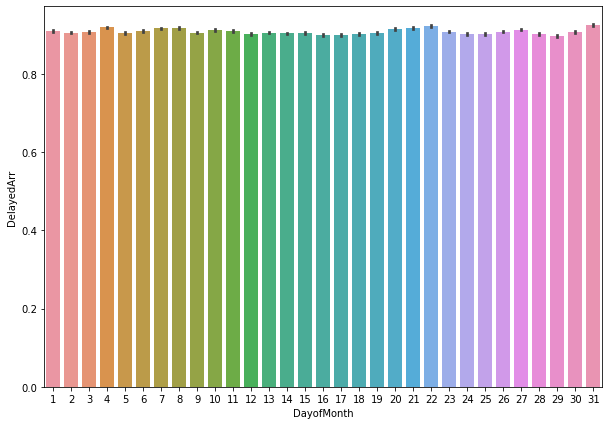

In [43]:
f, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data=df1, x='DayofMonth', y ='DelayedArr')

Plot UniqueCarrier by Month, if delayed or not.

<AxesSubplot:xlabel='Month', ylabel='DelayedArr'>

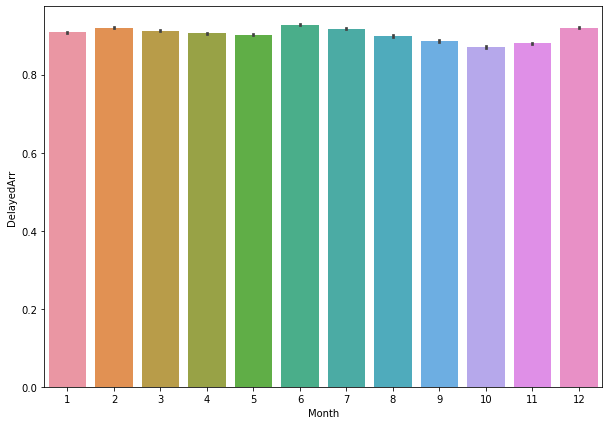

In [44]:
f, ax = plt.subplots(figsize=(10, 7))
sns.barplot(data=df1, x='Month', y ='DelayedArr')

**Altres noves Columnes possiblement interessants.**

**Columna TotalDelayed** : Suma dels minuts de les columnes Carrier, Weather, NAS, Security, LateAircraft Delay. Aquesta columna ens informara del total de minuts que un vol tarda en enlairse. Mes endavant a mes podriem fer un analisis de quan els vols son afectats per un delay quan tarden minuts tarden mes en sortir (comparant amb les columnes de DepTime o ArrTime), en contra dels que no son afectats per un d'aquest tipus de delay.

Cal tenir en compte que aquestes variables, tret de SecurityDelay, estan fortament correlacionades amb els retards en els vols (tal com es pot veure a les figures de Pearson's correlation). En aquesta columna he decidit afegir la feature SecurityDelay, per obtenir el temps total que provoquen aquests retards, encara que aquesta feature es independent de Arr/DepTime, no influeix al endarriment dels vols.

In [45]:
df1['TotalDelayed'] = (df1.CarrierDelay + df1.WeatherDelay + df1.NASDelay + df1.SecurityDelay + 
                       df1.LateAircraftDelay) 
df1.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiIn,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,VelocityAir,DelayedArr,TotalDelayed
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,4.0,8.0,0.0,0.0,0.0,0.0,0.0,379.687500,0,0.0
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,5.0,10.0,0.0,0.0,0.0,0.0,0.0,379.687500,1,0.0
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,3.0,17.0,0.0,0.0,0.0,0.0,0.0,321.875000,1,0.0
3,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,3.0,10.0,2.0,0.0,0.0,0.0,32.0,343.333333,1,34.0
4,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,4.0,10.0,0.0,0.0,0.0,0.0,0.0,408.712871,1,0.0


<AxesSubplot:xlabel='UniqueCarrier', ylabel='TotalDelayed'>

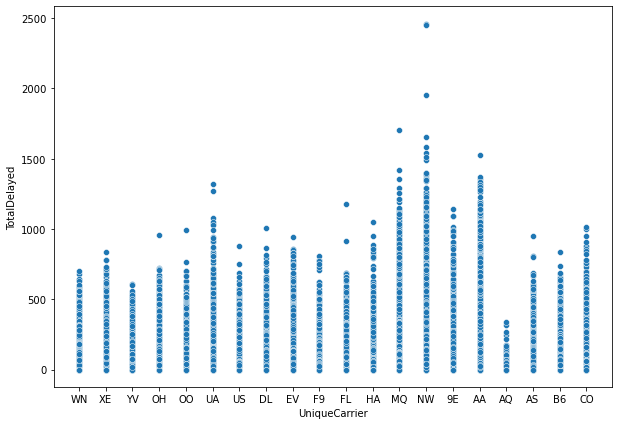

In [66]:
#Carriers vs minutes delayed
fig, ax =  plt.subplots(figsize=(10, 7))
sns.scatterplot(data=df1, x='UniqueCarrier', y='TotalDelayed')

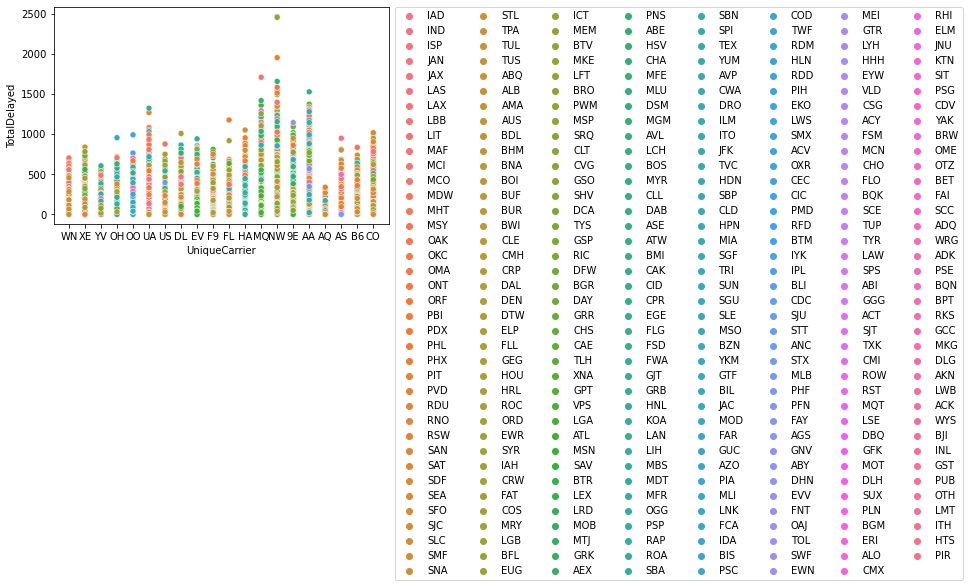

In [95]:
#la mateixa que l'anterior pero ara coloregem per veure si hi ha alguna significancia en els aeroports 
# que acumulen els retards mes llargs.
sns.scatterplot(data=df1, x='UniqueCarrier', y='TotalDelayed', hue='Origin')
plt.legend(bbox_to_anchor=(1.02, 1), loc='upper left', borderaxespad=0, ncol=8)

<AxesSubplot:xlabel='CRSDepTime', ylabel='TotalDelayed'>

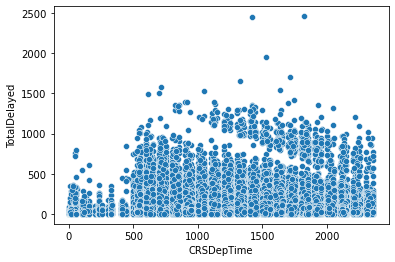

In [75]:
# Temps de delay que sufreixen els vols en funcio de les hores previstes en que surti el vol (les CRS!).
# Tenim en compte que TotalDelayed esta en minuts mentre que CRSDepTime esta en el format hhmm (hores i minuts junts)
sns.scatterplot(data=df1, x='CRSDepTime', y='TotalDelayed')

<AxesSubplot:xlabel='Month', ylabel='TotalDelayed'>

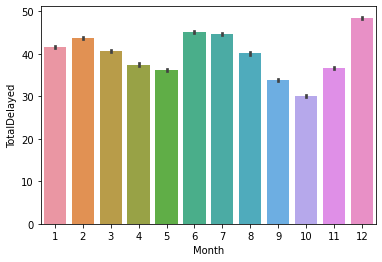

In [72]:
# Temps de delay que sufreixen els vols depenent del mes.
sns.barplot(data=df1, x='Month', y='TotalDelayed')

**TaxiTime**: Temps total que l'avio esta a la pista fent maniobres, tant abans de l'enlairment (TaxiOut) com despres de l'aterratge (TaxiIn). Esta lleugerment correlacionada amb les variables de DepTime, CRSDepTime, ArrTime, CRSArrTime, i NASDelay.

Amb aquesta nova feature podriem analitzar, per exemple, si hi ha aerolinies que tenen preferencia a l'hora de que el seu vol s'enlairi o aterri abans que algun altre.

In [51]:
df1['TaxiTime'] = df1.TaxiIn + df1.TaxiOut

df1.head()

,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,...,TaxiOut,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,VelocityAir,DelayedArr,TotalDelayed,TaxiTime
0,1,3,4,2003.0,1955,2211.0,2225,WN,335,N712SW,...,8.0,0.0,0.0,0.0,0.0,0.0,379.687500,0,0.0,12.0
1,1,3,4,754.0,735,1002.0,1000,WN,3231,N772SW,...,10.0,0.0,0.0,0.0,0.0,0.0,379.687500,1,0.0,15.0
2,1,3,4,628.0,620,804.0,750,WN,448,N428WN,...,17.0,0.0,0.0,0.0,0.0,0.0,321.875000,1,0.0,20.0
3,1,3,4,1829.0,1755,1959.0,1925,WN,3920,N464WN,...,10.0,2.0,0.0,0.0,0.0,32.0,343.333333,1,34.0,13.0
4,1,3,4,1940.0,1915,2121.0,2110,WN,378,N726SW,...,10.0,0.0,0.0,0.0,0.0,0.0,408.712871,1,0.0,14.0


<AxesSubplot:xlabel='TaxiTime', ylabel='NASDelay'>

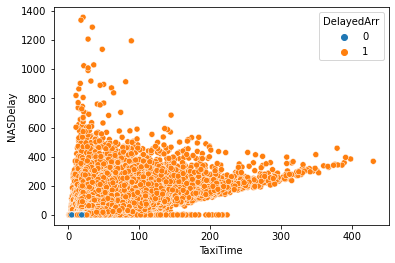

In [52]:
sns.scatterplot(data=df1, x='TaxiTime', y='NASDelay', hue = 'DelayedArr')

### Taula de les aerolínies amb més endarreriments acumulats

Utilitzem les dades DelayArr (nova columna creada) i UniqueCarrier per saber quan vols s'han endarrerit per cada aeorlina.

In [53]:
# els agrupem per aeorlinia i sumem els valors (1 per cada vol enderrerit) per saber quan porten acumulat en total 
# de vols que porten retresats.
puntualitat = df1.groupby('UniqueCarrier')[['DelayedArr']].sum()
puntualitat.sort_values(by=['DelayedArr'], ascending=False)

,DelayedArr
UniqueCarrier,
WN,331992
AA,174443
MQ,132375
UA,125810
OO,123642
DL,102476
XE,95528
CO,85319
US,84710


### Quins són els vols més llargs? I els més endarrerits?

**Vols mes llargs**

Els vols mes llargs son els que recorren mes milles i tenen temps a l'aire mes gran.

Primer els agruparem per Origen-desti i farem les mitjanes de la distancia i de temps a l'aire, ja que els hem de reordenar per aquestes dues variables per obtenir els vols mes llargs.

In [54]:
# groupby Origin, destination over Distance and AirTime, despres hem de fer la mitjana, ja que volem ordenar per
# maxim valors de distancia i temps a l'aire. 
mAirDis = df1.groupby(['Origin', 'Dest'])[['Distance','AirTime']].mean()
smAirT = mAirDis.sort_values(by=['Distance', 'AirTime'], ascending=False).reset_index()

# com que surten "mirroed" posem els 10 valors mes grans:
smAirT.loc[:20,['Origin', 'Dest']]


,Origin,Dest
0,EWR,HNL
1,HNL,EWR
2,ATL,HNL
3,HNL,ATL
4,ORD,HNL
5,HNL,ORD
6,KOA,ORD
7,ORD,OGG
8,MSP,HNL
9,HNL,MSP


In [55]:
# Si el que volem saber en compte es el numero de vol (FlightNum) dels vols mes llargs haurem de fer simplement:
# Com es d'esperar els Origens i destins dels vols mes llargs son els de EWR-HNL (Newark a Honolulu).
# https://www.airmilescalculator.com/distance/ewr-to-hnl/

# El codi seguent ens diu quins son aquests vols:
#sortdf1 = df1.sort_values(by=['Distance','AirTime'], ascending=False).reset_index()
#sortdf1.loc[0:19, ['Origin', 'Dest', 'FlightNum', 'TailNum']]

**Vols mes endarrerits**

Ara busquem els vols que han arribat mes tard. Per fer-ho utilitzarem les columnes de ArrDelay i DepDelay, pero aquest cop per separat, per veure si els ranking dels vols mes endarrits es mantenen.

Primer, fem els ArrDelay:

In [56]:
# sort values de ArrDelay:
tmp = df1.sort_values(['ArrDelay'], ascending=False).reset_index()

print('Els 10 vols que han arribat mes tard son els corresponents als numeros de vol, Origen i desti:')
tmp.loc[:10,['FlightNum', 'Origin', 'Dest']]

Els 10 vols que han arribat mes tard son els corresponents als numeros de vol, Origen i desti:


,FlightNum,Origin,Dest
0,808,HNL,MSP
1,1699,CLT,MSP
2,1107,RSW,DTW
3,3538,LIT,DFW
4,357,BOS,MSP
5,512,OMA,MSP
6,1472,MOT,MSP
7,2398,EGE,MIA
8,804,SEA,MSP
9,1743,BNA,MEM


Ara farem el mateix per els vols que han sortit tard.

In [57]:
# sort values de DepDelay:
tmp = df1.sort_values(['DepDelay'], ascending=False).reset_index()

print('Els 10 vols que han arribat mes tard son els corresponents als numeros de vol, Origen i desti:')
tmp.loc[:10, ['FlightNum', 'Origin', 'Dest']]

Els 10 vols que han arribat mes tard son els corresponents als numeros de vol, Origen i desti:


,FlightNum,Origin,Dest
0,1699,CLT,MSP
1,808,HNL,MSP
2,1107,RSW,DTW
3,3538,LIT,DFW
4,357,BOS,MSP
5,512,OMA,MSP
6,1472,MOT,MSP
7,2093,LGA,MIA
8,804,SEA,MSP
9,1743,BNA,MEM


Podem veure que els vols que surten mes tard, son els que acumulen mes enderrariment a l'arribada. En el cas dels 10 primers nomes difereixen en els vols 2093 (sortida) i 2398 (arribada) en el rank 7, la resta de vols rankejats tenen el mateix rank (o creuats com al cas del 808 i l'1699) en el rankning d'endarrirment en sortida i arribada.

## Exercici 3: Exporta el data set net i amb les noves columnes a Excel.

Guardem l'arxiu de les dades netes i les noves columnes que hem afegit:

In [58]:
#df1.to_csv('DelayedFlights_Mod.csv')